# HW 6 Eli Weiss

In [1]:
# --- This Document is the home work assignment for week six in James Tapors's class in the Katz school 
# DAV Master's Program ---


# read the data file from GitHub and convert to a Pandas dataframe object
import pandas as pd
import numpy as np
D = pd.read_csv('https://raw.githubusercontent.com/enwweiss/DAV-5400/master/diamonds.csv')

**Question 1:** What proportion of diamonds are between .30 and 1.08 carats?

In [2]:
# Here I am looking for values greater than .29 and are less than 1.09. These values are indexed out of the column.
# the Proportion is computed by the amount of items divided by the total amount in the column.It it then rounded to 2 
# decimal places.
round(len(D.carat[np.logical_and(D.carat >.29, D.carat < 1.09)])/len(D.carat), 2)

0.75

**Question 2:** How many of the diamonds have equal x and y dimensions?

In [3]:
#Here we are indexing to see which values in column X satisify the condition that they are equal to corresponding 
# value in column y
len(D.x[D.x==D.y])

17

**Question 3:** How many of the diamonds have a carat less than the mean carat value?

In [4]:
#Here we are indexing to see which values in column 'Carat' satisify the condition that they are grater than the mean
# of all values in column 'Carat'. We then count the results to get the answer to this question.
len(D.carat[D.carat>np.mean(D.carat)])

22813

**Question 4:** How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal

In [5]:
#Here we are indexing to see which values in column 'cut' satisify the condition that they are equal to 
# 'Preimum' or 'Ideal'. We then count the results to get the answer to this question.
len(D.cut[np.logical_or(D.cut=='Premium', D.cut == 'Ideal')])

35342

**Question 5:** Which diamond has the highest price per carat? What is its value?

In [6]:
#Here we divide each value in price by the amount of carets
# this returns a series of values that hold the price per caret
p2c = D.price/D.carat

# We then find the diamond that has the highest price per caret
print('Max Price Per Carat:',p2c[p2c == max(p2c)])

#and now that we know the correct diamond we can find its actual price
print('Price: $',D.price[27635])

Max Price Per Carat: 27635    17828.846154
dtype: float64
Price: $ 18542


**Question 6:** Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set?

<BarContainer object of 5 artists>

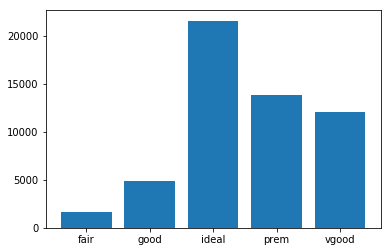

In [9]:

import matplotlib.pyplot as plt
fair = len(D.cut[D.cut == 'Fair'])
good = len(D.cut[D.cut == 'Good'])
ideal = len(D.cut[D.cut == 'Ideal'])
prem = len(D.cut[D.cut == 'Premium'])
vgood = len(D.cut[D.cut == 'Very Good'])

x = list([fair, good, ideal, prem, vgood])
x_ = list(['fair', 'good', 'ideal', 'prem', 'vgood'])
plt.bar(x_,x)

This plot shows us that the data is not normally distributed and consequently we need to be carful if we try to learn from it. If we tried to learn the relationship between attributes in the dataset we will be looking at skewed results.

**Question 7:** Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots

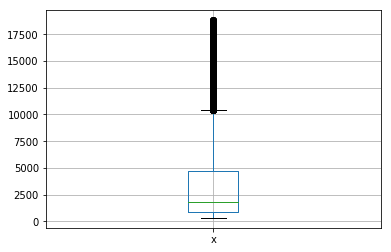

In [3]:
#Here is a box plot showing the prices for Cuts that are Ideal
pd.DataFrame.boxplot(D.price[D.cut=='Ideal'])

- The plot above shows us that Ideal cuts have a median value beneath 2500 dollars
- and that the range for a normal diamond is between ~ 1000 dollars - 5000 dollars

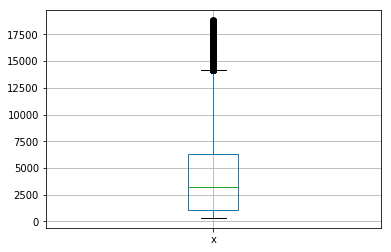

In [4]:
pd.DataFrame.boxplot(D.price[D.cut=='Premium'])

- The plot above shows us that Premium cuts have a median value above 2500 dollars
- and that the range for a normal diamond is between ~ 1500 dollars - 6500 dollars

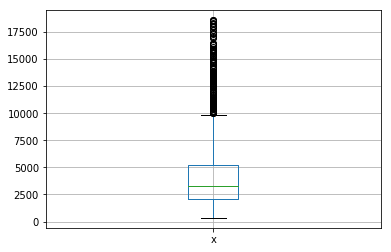

In [5]:
pd.DataFrame.boxplot(D.price[D.cut=='Fair'])

- The plot above shows us that Fair cuts have a median value around 3000 dollars
- and that the range for a normal diamond is between ~ 2500 dollars - 5000 dollars

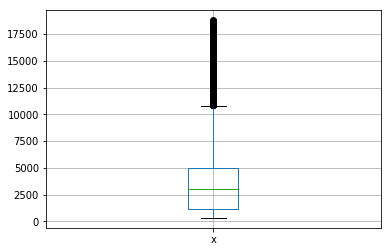

In [6]:
pd.DataFrame.boxplot(D.price[D.cut=='Good'])

- The plot above shows us that Good cuts have a median value just over 2500 dollars
- and that the range for a normal diamond is between ~ 1500 dollars - 5000 dollars

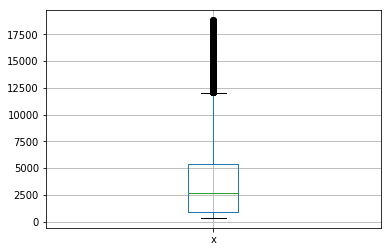

In [7]:
pd.DataFrame.boxplot(D.price[D.cut=='Very Good'])

- The plot above shows us that Very Good cuts have a median value of 2500 dollars
- and that the range for a normal diamond is between ~ 1000 dollars - 5000 dollars

Question 8: Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D374167198>,
      dtype=object)

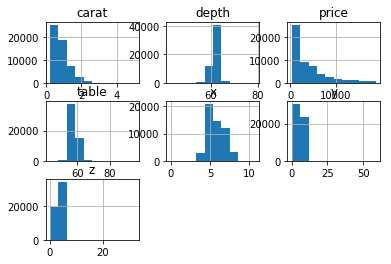

In [18]:
#x = length
#y = width
#z = total depth

pd.DataFrame.hist(D)

In the histograms above we depth, totalt depth, width, and length do not vary much.

**Question 9:** Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

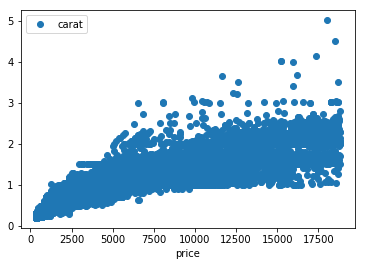

In [19]:
D.plot(x='price', y='carat', style='o')

Here the relationship is posative indicating that the higher the caret, the higher the price.

However, it should be noted:
- There is fan pattern indicating non-constant variance. 
- The underlying data needs to be tested for normallity and as we saw in cut type it is not - in order to understand if there is truely a relationship between these variables.